# **KMeans**

[2362362.0, 1474928.512307769, 1387431.075132158, 1303471.8857646866, 1263198.1141582918, 1245930.6202748832, 1230825.0261610376, 1211530.0066599704, 1204686.3103511613, 1199396.5071347163, 1193830.3471811896, 1188436.7839042586, 1183256.264533338, 1178400.6108346528, 1176725.8096872878, 1175915.4524736998, 1175333.4597189564, 1175189.1330287906, 1175091.2445854363, 1175073.7332125322, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 1175065.271077916, 117

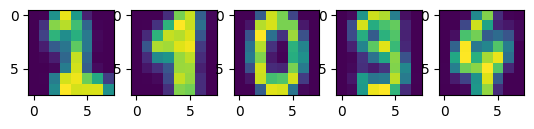

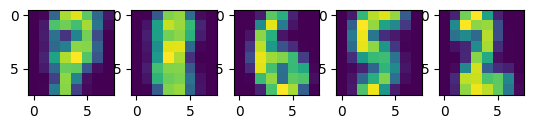

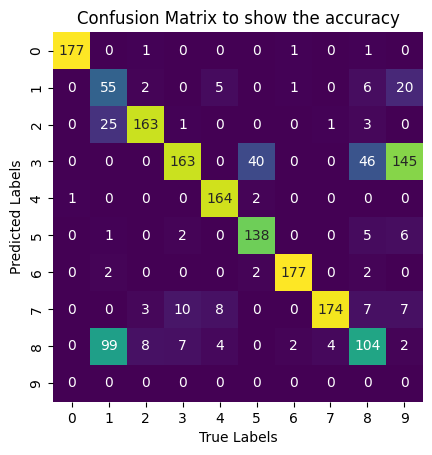

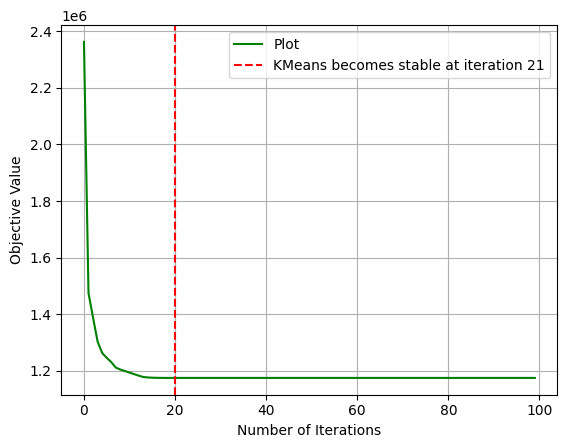

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
# Ignore this
from warnings import simplefilter
simplefilter(action = "ignore", category = FutureWarning)

digits = load_digits()
X, Y = digits.data, digits.target


def kmeans(X, k, max_iter):
  
  n = X.shape[0]
  centers = X[np.random.choice(n, k, replace = False)]
  ob_values = []

  for _ in range(max_iter):
    distances = np.linalg.norm(X[:, np.newaxis, :] - centers, axis = -1)
    labels = np.argmin(distances, axis = -1)

    for i in range(len(centers)):
      centers[i] = np.mean(X[labels == i], axis = 0)
    
    ob_val = 0

    for i in range(n):   
      ob_val += (distances[i, labels[i]])**2
    ob_values.append(ob_val)
   
  # To account for permuted labels and Digits 
  lab = np.zeros_like(labels)
  for i in range(10):
    mask = (labels == i)
    lab[mask] = mode(Y[mask])[0]

  return lab, centers, ob_values



labels, centers, obj_values = kmeans(X, 10, 100)
print(obj_values)
print("Predicted Labels:")
print(labels)
print("\nActual Labels:")
print(Y)
print("\nThe Accuracy Score")
print(accuracy_score(labels, Y))

print("The Centers are:")
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(centers[i].reshape((8, 8)))
plt.show()
for i in range(5, 10):
  plt.subplot(1, 5, i - 4)
  plt.imshow(centers[i].reshape((8, 8)))
plt.show()

cm = confusion_matrix(labels, Y)
sns.heatmap(cm, square = True, annot = True, fmt = "d", cbar = False, xticklabels = digits.target_names, yticklabels = digits.target_names, cmap = "viridis")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix to show the accuracy")
plt.show()

for i in range(len(obj_values)):
    if obj_values[i] == obj_values[i + 1]:
        ind = i
        break
itr = np.arange(0, 100)
plt.plot(itr, obj_values, "green")
plt.axvline(x = ind, linestyle = "--", color = "red")
plt.legend(["Plot", f"KMeans becomes stable at iteration {i + 1}"])
plt.xlabel("Number of Iterations")
plt.ylabel("Objective Value")
plt.grid()
plt.show()

# **KCenter**

[9 7 1 2 5 4 1 3 5]
The Centers are:


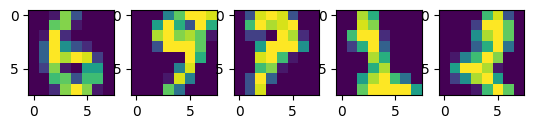

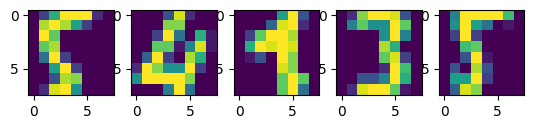

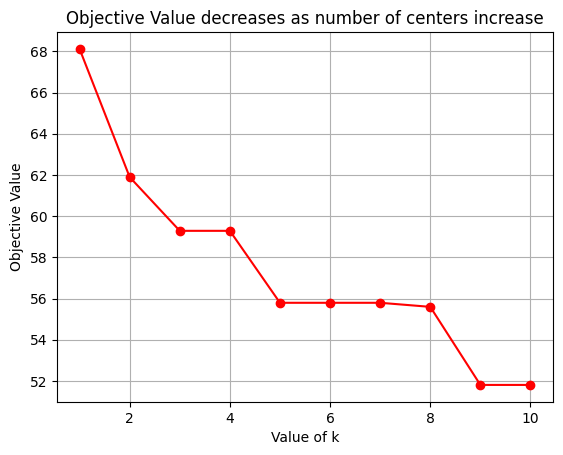

+---------+--------------------+
| k value |  Objective Value   |
+---------+--------------------+
|    1    | 68.11754546370561  |
|    2    | 61.89507250177513  |
|    3    | 59.28743543112655  |
|    4    | 59.28743543112655  |
|    5    | 55.794264938253285 |
|    6    | 55.794264938253285 |
|    7    | 55.794264938253285 |
|    8    | 55.59676249567055  |
|    9    | 51.807335387954474 |
|    10   | 51.807335387954474 |
+---------+--------------------+


In [ ]:
from prettytable import PrettyTable
X, Y = digits.data, digits.target

def cluster(X, centers):
  distances = np.linalg.norm(X[:, np.newaxis, :] - centers, axis = -1)
  labels = np.argmin(distances, axis = 1)
  return distances, labels

def Kcost(X, centers):
  cost = 0
  dist, labels = cluster(X, centers)
  for i in range(len(labels)):
    cost = max(cost, dist[i, labels[i]])
  return cost

def kcenter(X, k):
  n = X.shape[0]
  centers = [X[np.random.randint(n)]]
  indices = []
  costs = [Kcost(X, centers)]
  for i in range(k - 1):
    distances = np.linalg.norm(X[:, np.newaxis, :] - centers, axis = -1).sum(axis = 1)
    new_center_index = np.argmax(distances, axis = 0)
    indices.append(new_center_index)
    centers.append(X[new_center_index])
    costs.append(Kcost(X, centers))
  return centers, indices, costs


centers, indices, costs = kcenter(X, 10)
print(Y[indices])
print("The Centers are:")
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(centers[i].reshape((8, 8)))
plt.show()
for i in range(5, 10):
  plt.subplot(1, 5, i - 4)
  plt.imshow(centers[i].reshape((8, 8)))
plt.show()


k = np.arange(1, 11)
plt.plot(k, costs, "ro-")
plt.grid()
plt.xlabel("Value of k")
plt.ylabel("Objective Value")
plt.title("Objective Value decreases as number of centers increase")
plt.show()

table = PrettyTable()
table.field_names = ["k value", "Objective Value"]
for i in range(10):
  table.add_row([i +1, costs[i]])
print(table)

# **K Nearest Neighbour Classifier**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter
iris = load_iris()
X, Y = iris.data, iris.target
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size = 0.25)

k = 5
# y_model = []
# for x in Xtest:
#   dist = []
#   for c in Xtrain:
#     dist.append(np.linalg.norm(c - x))
#   indices = np.argsort(dist)[:k]
#   targets = Ytrain[indices]
#   predicted_label = Counter(targets).most_common(1)[0][0]
#   y_model.append(predicted_label)

# A Better Code:
def KNN(Xtrain, Ytrain, Xtest, k):
  dist = np.linalg.norm(Xtest[:, np.newaxis, :] - Xtrain, axis = -1)
  ind = np.argsort(dist, axis = 1)
  ind = ind[:, :k]
  K_classes = np.array([Ytrain[x] for x in ind])
  Y_model = np.array([Counter(x).most_common(1)[0][0] for x in K_classes])
  return Y_model

y_model = KNN(Xtrain, Ytrain, Xtest, k)

print("Predicted Labels:")
print(np.array(y_model))
print("\nActual Labels:")
print(Ytest)
print("\nAccuracy Score:")
print(accuracy_score(y_model, Ytest))

Predicted Labels:
[2 0 2 2 1 1 2 0 1 2 2 2 0 1 1 2 2 0 2 0 0 1 2 2 1 2 1 1 1 0 2 2 0 2 1 1 1
 2 2 1 1 0 2 0 1 2 1 0 1 2 2 1 0 0 1 2 1 2 1 0 1 0 1 0 2 0 2 1 2 2 2 1 0 2
 0 1 0 0 1 0 2 0 0 2 1 0 0 2 0 0 0 0 0 2 2 2 0 1 1 2 1 2 2 0 0 1 0 0 1 1 0
 2 0]

Actual Labels:
[2 0 2 2 1 1 2 0 1 2 2 1 0 2 1 2 2 0 2 0 0 1 2 2 1 2 1 1 1 0 2 2 0 2 1 1 1
 2 2 1 1 0 2 0 1 2 1 0 1 2 2 1 0 0 2 2 1 2 1 0 1 0 1 0 2 0 2 1 2 2 2 1 0 2
 0 1 0 0 1 0 2 0 0 2 1 0 0 2 0 0 0 0 0 2 2 1 0 1 1 2 1 2 2 0 0 1 0 0 1 1 0
 2 0]

Accuracy Score:
0.9646017699115044


# **Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine

wine = load_wine()
X, Y = wine.data, wine.target

model = GaussianNB()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size = 0.25)
model.fit(Xtrain, Ytrain)
y_model = model.predict(Xtest)
print("Predicted Labels:")
print(np.array(y_model))
print("\nActual Labels:")
print(Ytest)
print("\nAccuracy Score:")
print(accuracy_score(y_model, Ytest))

Predicted Labels:
[1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 2 2 1 1 1 2 2 0 1 0 0 0 1 0 2 1 1 1 2 1
 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 2 0 1 2 2 1 2 2 2 0 1 1 0 1 1 1 2 1 0
 1 0 1 1 1 2 1 0 0 0 2 2 1 1 1 1 1 1 1 1 1 2 0 0 1 2 2 2 1 0 2 2 1 2 0 1 0
 0 2 1 0 2 1 1 1 1 2 0 0 2 2 2 0 0 0 1 1 2 0 1]

Actual Labels:
[1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 2 2 1 1 0 2 2 0 1 0 0 0 1 0 2 1 1 1 2 1
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 2 0 1 2 2 1 2 2 2 0 1 1 0 0 1 1 2 1 0
 1 0 1 1 1 2 0 0 0 0 2 2 0 1 1 1 1 1 1 1 1 2 0 0 1 2 2 2 1 0 2 2 1 2 0 1 0
 0 2 1 0 2 1 1 1 1 2 0 0 2 2 2 0 0 0 1 1 2 0 1]

Accuracy Score:
0.9552238805970149


# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, Y = diabetes.data, diabetes.target

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size = 0.45)
model = LinearRegression()
model.fit(Xtrain, Ytrain)
y_model = model.predict(Xtest)
print("First 10 Predicted Labels:")
print(np.array(y_model[:10]))
print("\nFirst 10 Actual Labels:")
print(Ytest[:10])
print("\nRMSE:")
print(mean_squared_error(y_model, Ytest)**0.5)

First 10 Predicted Labels:
[207.06828293 145.74155297 181.70800133 232.18837179 145.15057859
 225.36980872 172.48912217 165.45871961 126.60576782 144.98762215]

First 10 Actual Labels:
[109.  60. 263. 261. 197.  99. 122.  91.  83.  73.]

RMSE:
54.76358134102201


# **Principal Component Analysis (PCA)**



## **Scratch PCA**

In [ ]:
def My_PCA(X, k):
  means = np.mean(X, axis = 0)
  stds = np.std(X, axis = 0)
  # Scaling the X: same as StandardScaler()
  My_X_scaled = (X - means)/stds
  # Computing the Covariance Matrix of Scaled X
  cov = np.cov(My_X_scaled.T)
  # Finding EigenValues and EigenVectors of Covariance Matrix
  values, vectors = np.linalg.eig(cov)
  #Adjusting the signs of the EigenVectors
  max_abs_idx = np.argmax(np.abs(vectors), axis=0)
  signs = np.sign(vectors[max_abs_idx, range(vectors.shape[0])])
  vectors = vectors*signs[np.newaxis,:]
  vectors = vectors.T
  # Finding the Indices of the largest EigenValues
  indices = np.argsort(values)[::-1]
  eig = vectors[indices]
  # Taking only the Top k EigenVectors
  W = eig[:k]
  # Finally projection of Original Scaled data using the Top k EigenVectors
  X_proj = My_X_scaled @ W.T
  return X_proj

## **Built-in PCA**

In [ ]:
X, Y = wine.data, wine.target
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = PCA(n_components = 2)
X2D = model.fit_transform(X_scaled)
print(X2D[:10])
print()
X_2D_My = My_PCA(X, 2)
X_2D_My[:,1] = - X_2D_My[:,1]
print(X_2D_My[:10])
X_filtered = model.inverse_transform(X2D)
print()
print(X_filtered[:10])
print()
print(X[:10])

[[ 3.31675081 -1.44346263]
 [ 2.20946492  0.33339289]
 [ 2.51674015 -1.0311513 ]
 [ 3.75706561 -2.75637191]
 [ 1.00890849 -0.86983082]
 [ 3.05025392 -2.12240111]
 [ 2.44908967 -1.17485013]
 [ 2.05943687 -1.60896307]
 [ 2.5108743  -0.91807096]
 [ 2.75362819 -0.78943767]]

[[ 3.31675081 -1.44346263]
 [ 2.20946492  0.33339289]
 [ 2.51674015 -1.0311513 ]
 [ 3.75706561 -2.75637191]
 [ 1.00890849 -0.86983082]
 [ 3.05025392 -2.12240111]
 [ 2.44908967 -1.17485013]
 [ 2.05943687 -1.60896307]
 [ 2.5108743  -0.91807096]
 [ 2.75362819 -0.78943767]]

[[ 1.17683758 -0.48854671  0.44943066 -0.80905314  0.90346271  1.40287378
   1.39791791 -0.9486178   1.09629808  0.47110942  0.58106277  1.01020946
   1.47780928]
 [ 0.15764475 -0.61672373 -0.10990684 -0.52523924  0.21383059  0.85030558
   0.93557863 -0.66919329  0.67940854 -0.37249229  0.74867543  0.88597056
   0.51191298]
 [ 0.8619575  -0.3851356   0.32075278 -0.61322768  0.66632506  1.06032437
   1.06095125 -0.72165424  0.8293466   0.32348051  0.458

## **PCA as a Noise Filter**

### **KMeans on Original Data**

<Axes: >

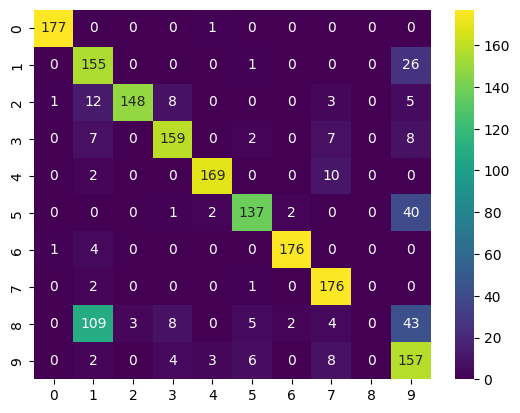

In [ ]:
from sklearn.cluster import KMeans
X = digits.data
Xnew = np.random.normal(X, 2)

kmeans = KMeans(n_clusters = 10, n_init = "auto", random_state = 42)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

lab = np.zeros_like(cluster_labels)
for i in range(10):
  mask = cluster_labels == i
  lab[mask] = mode(digits.target[mask])[0] 
  
cm = confusion_matrix(digits.target, lab)
sns.heatmap(cm, cmap = "viridis", annot = True, fmt = ".3g")

### **KMeans on Noisy Data**

<Axes: >

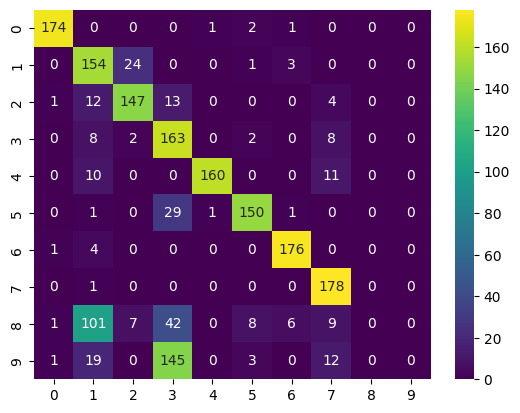

In [ ]:
kmeans = KMeans(n_clusters = 10, n_init = "auto", random_state = 42)
kmeans.fit(Xnew)
cluster_labels = kmeans.predict(Xnew)

lab = np.zeros_like(cluster_labels)
for i in range(10):
  mask = cluster_labels == i
  lab[mask] = mode(digits.target[mask])[0] 
  
cm = confusion_matrix(digits.target, lab)
sns.heatmap(cm, cmap = "viridis", annot = True, fmt = ".3g")

### **KMeans on Noise Removed using PCA inverse transform**

<Axes: >

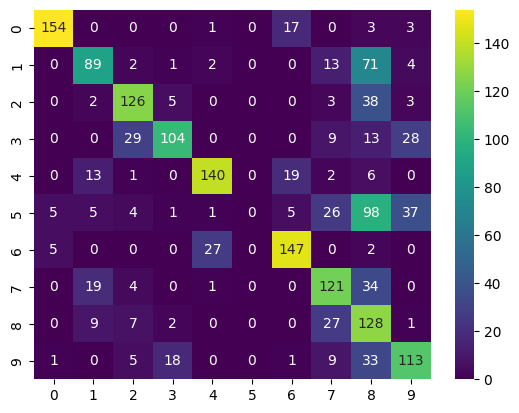

In [ ]:
model = PCA(n_components = 2, random_state = 42)
X_model = model.fit_transform(Xnew)
filtered = model.inverse_transform(X_model)  # To get back to original dimensional space
kmeans = KMeans(n_clusters = 10, n_init = "auto", random_state = 42)
kmeans.fit(filtered)
cluster_labels = kmeans.predict(filtered)

lab = np.zeros_like(cluster_labels)
for i in range(10):
  mask = cluster_labels == i
  lab[mask] = mode(digits.target[mask])[0] 

cm = confusion_matrix(digits.target, lab)
sns.heatmap(cm, cmap = "viridis", annot = True, fmt = ".3g")

### **Look at the three digits**

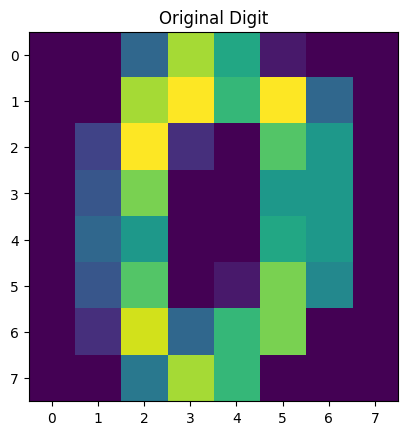

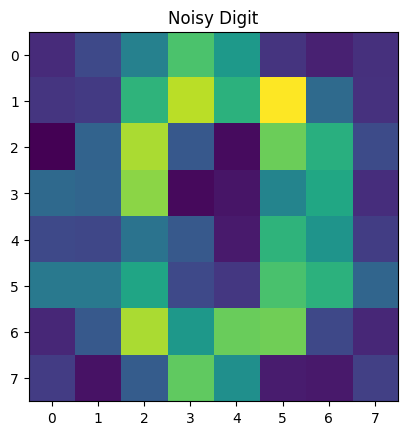

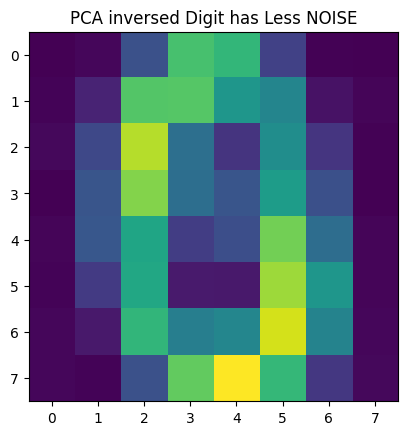

In [ ]:
plt.imshow(X[0].reshape((8, 8)))
plt.title("Original Digit")
plt.show()
plt.imshow(Xnew[0].reshape((8, 8)))
plt.title("Noisy Digit")
plt.show()
plt.imshow(filtered[0].reshape((8, 8)))
plt.title("PCA inversed Digit has Less NOISE")
plt.show()

# **Support Vector Machine (SVM) Classifier**

In [ ]:
from sklearn.svm import SVC
X, Y = digits.data, digits.target
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size = 0.25)
# SVC has mainly three parameters: kernel, gamma, C
# Main kernels include: Linear(linear), RBF(Radial Basis Function)(rbf), Polynomial(poly): These define the nature of manifold boundries surfacing the clusters
# By default kernel = "rbf", C = 1.0, gamma = controls the width of Gaussian kernels like rbf, ploy, sigmoid
model = SVC(kernel = "rbf", C = 1.0)
model.fit(Xtrain, Ytrain)
y_model = model.predict(Xtest)
print("Predicted Labels:")
print(np.array(y_model))
print("\nActual Labels:")
print(Ytest)
print("\nAccuracy Score:")
print(accuracy_score(y_model, Ytest))

Predicted Labels:
[9 7 1 ... 9 2 7]

Actual Labels:
[9 7 1 ... 9 2 7]

Accuracy Score:
0.9695845697329377


In [ ]:
print(model.support_vectors_.shape)
print(model.support_vectors_)

(308, 64)
[[ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  0. ...  9.  0.  0.]
 [ 0.  0.  2. ...  9.  1.  0.]
 ...
 [ 0.  0. 12. ... 15.  6.  0.]
 [ 0.  0. 10. ... 10.  0.  0.]
 [ 0.  0.  1. ... 13.  0.  0.]]


# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X, Y = wine.data, wine.target
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size = 0.25)
model = DecisionTreeClassifier()
model.fit(Xtrain, Ytrain)
y_model = model.predict(Xtest)
print("Predicted Labels:")
print(np.array(y_model))
print("\nActual Labels:")
print(Ytest)
print("\nAccuracy Score:")
print(accuracy_score(y_model, Ytest))

Predicted Labels:
[0 2 1 2 2 0 0 0 1 2 0 1 0 1 1 1 1 1 0 0 2 1 2 2 1 1 0 1 1 0 0 0 1 2 0 0 2
 0 0 2 1 1 1 1 0 1 1 2 2 0 0 1 1 0 2 2 2 2 1 0 1 1 0 0 1 1 1 2 2 0 2 0 2 2
 0 2 2 1 2 2 0 2 0 1 2 2 0 2 2 0 2 2 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 2 0
 1 2 0 1 1 0 0 2 1 2 0 0 1 0 0 0 0 2 2 1 1 1 2]

Actual Labels:
[0 2 1 2 2 1 0 1 1 2 0 1 0 1 1 0 1 2 1 0 2 1 2 2 1 1 0 1 1 1 0 0 0 2 0 1 2
 1 0 2 1 1 1 1 0 0 1 2 2 0 0 1 1 0 2 2 2 2 1 0 1 0 0 0 1 1 1 2 2 0 2 0 2 2
 0 2 2 1 2 1 0 2 0 1 0 2 0 2 2 0 2 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 2 0
 1 1 0 1 1 0 0 2 1 2 0 0 1 0 0 0 0 2 2 1 1 2 1]

Accuracy Score:
0.8731343283582089


## **Decision Boundaries**

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

<ipython-input-16-2012e9cc4787>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


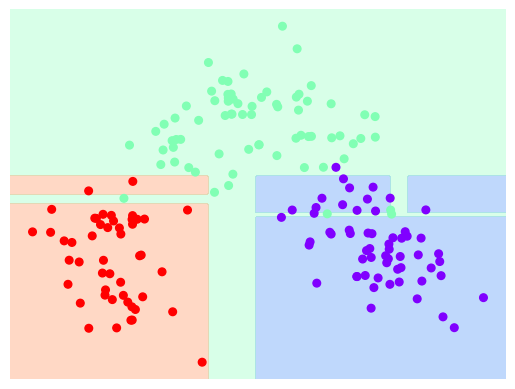

In [ ]:
model = PCA(n_components = 2)
X2D = model.fit_transform(X_scaled)
visualize_classifier(DecisionTreeClassifier(), X2D, Y)